In [ ]:
import json

with open('output/executions/36/simulations/cortex_1/1/bin_rates_B.json', 'r') as j:
     contents = json.loads(j.read())

In [ ]:
times = list(map(int, list(contents.keys())))
values = list(contents.values())
values = [x for _, x in sorted(zip(times, values))]
times = sorted(times)

window_size = 10
i = window_size//2
ma = []

values = values+values+values+values
values = [0 for x in range(window_size//2)] + values + [0 for x in range(window_size//2)]

while i < (len(values) - window_size//2):
    
    window = values[(i - window_size//2) : (i + window_size//2)]
    window_average = round(sum(window) / window_size, 2)
    
    ma.append(window_average)
    
    i += 1

print(len(values))
print(len(ma))
  

In [ ]:
import matplotlib.pyplot as plt
times = times+[t+3000 for t in times]+[t+6000 for t in times]+[t+9000 for t in times]
print(len(times))
print(len(ma))
plt.plot(times, ma)

In [ ]:
def divide_into_trials(seq, size):
    return [seq[int(pos):(int(pos) + int(size))] for pos in range(0, len(seq), int(size))]

In [ ]:
values = [2,3,4,5,6,7,1,1,1,1,3,4,5,6]
threshold = 4
trial_time = 10
bin_size = 2
elements_for_trial = trial_time/bin_size
values_into_trials = divide_into_trials(values, elements_for_trial)
response_times = []
print(values_into_trials)
for values_index, trial_values in enumerate(values_into_trials):
    time_ids = [time_id for time_id, value in enumerate(trial_values) if value >= threshold]
    if len(time_ids):
        first_time_id = time_ids[0]
        print(first_time_id)
        actual_time = (values_index*trial_time)+(first_time_id*bin_size)
        response_times.append(actual_time)
print(response_times)

In [ ]:
import numpy as np

senders=[2529]
times=[6550.8]
number_monitored_neurons=12
bin_size=5
end_time=9000.0
start_time=3000.0
split_into=2

bins = list(range(int(start_time), int(end_time)+1, bin_size))

monitored_times = {}

for index, time in enumerate(times):
    bin_index = np.digitize(time, bins, right=True)
    if bin_index < len(bins):
        bin_time = np.take(bins, bin_index)
        if bin_time in monitored_times:
            monitored_times[bin_time].append(senders[index])
        else:
            monitored_times[bin_time] = [senders[index]]
for id in monitored_times:
    monitored_times[id].sort()

bin_rates = {}

for bin_time in bins:
    if bin_time in monitored_times:
        bin_rate = len(monitored_times[bin_time]) * 1000 / (bin_size * number_monitored_neurons)
        # bin_rate = len(monitored_times[bin_time]) * 1000 / bin_size
        print(monitored_times)
        print(bin_time)
        bin_rates[bin_time] = bin_rate
    else:
        bin_rates[bin_time] = 0
    

bin_rates_split = {i: [] for i in range(split_into)}

step = int((end_time-start_time)/split_into)
start = int(start_time)
end = int(end_time)
for index, value in enumerate(range(start, end, step)):
    bin_rates_split[index] = {k:v for k, v in bin_rates.items() if (k>=value and k<value+step)}


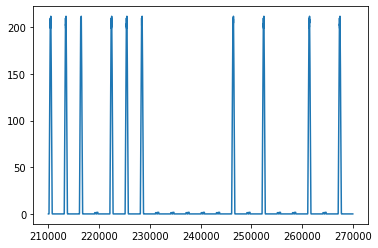

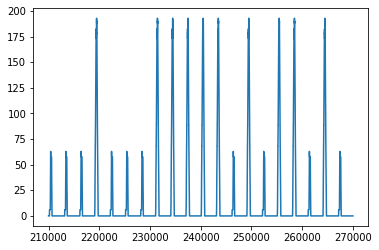

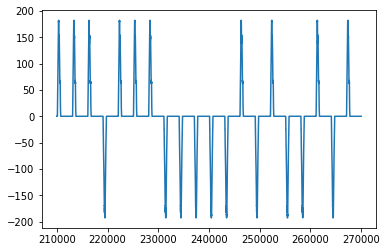

RESPONSE TIMES:  [125, 125, 125, 125, 125, 125, 125, 125, 125, 125]


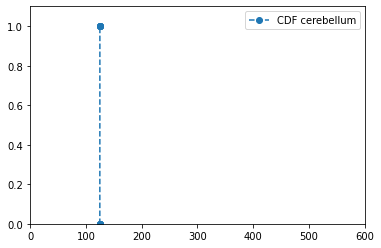

In [15]:
from src.nest.plots.generate import moving_average_plot_no_save
from src.nest.output.rates import calculate_response_times
import json
import matplotlib.pyplot as plt

with open('output/executions/321/simulations/cerebellum_simple/1/bin_rates_DCN_a_test_2.json', 'r') as j:
        bin_rates = json.loads(j.read())

ma_rates_a, times = moving_average_plot_no_save(bin_rates)
plt.figure()
plt.plot(times, ma_rates_a)
plt.show()

with open('output/executions/321/simulations/cerebellum_simple/1/bin_rates_DCN_b_test_2.json', 'r') as j:
        bin_rates = json.loads(j.read())
ma_rates_b, times = moving_average_plot_no_save(bin_rates)
plt.figure()
plt.plot(times, ma_rates_b)
plt.show()

ma_rates = [abs(a-b) for a, b in zip(ma_rates_a, ma_rates_b)]

plt.figure()
plt.plot(times, ma_rates)
plt.show()

trial_time = 3000
bin_size = 5

response_times = []
resp = calculate_response_times(ma_rates, 4.1, trial_time, bin_size)
for rt in resp:
    response_times.append(rt%1000)

print('RESPONSE TIMES: ', response_times)

# CDF plot for spike times
import numpy as np
import matplotlib.pyplot as plt

def cdf_calc(data):
    count, bins_count = np.histogram(data, bins=10)
    try:
        pdf = count / sum(count)
    except:
        pdf = 0
    cdf = np.cumsum(pdf)
    return bins_count, cdf

bins_count, cdf = cdf_calc(response_times)

plt.xlim(0, 600)
plt.ylim(0, 1.1)
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, '--o', label="CDF cerebellum")
plt.legend()

plt.show()